In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('words')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from textblob import TextBlob

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Scrapping the tweets of P.M Narendra Modi

In [2]:
import snscrape.modules.twitter as sntwitter
query = "(from:narendramodi) until:2022-11-01 since:2022-01-01 lang:en"
tweets = []
limit=10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

C:\Users\sunny\AppData\Local\Temp\ipykernel_8460\1582489909.py:13: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
C:\Users\sunny\AppData\Local\Temp\ipykernel_8460\1582489909.py:13: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


                          Date          User  \
0    2022-10-31 03:57:59+00:00  narendramodi   
1    2022-10-30 13:42:29+00:00  narendramodi   
2    2022-10-30 13:41:36+00:00  narendramodi   
3    2022-10-30 13:41:12+00:00  narendramodi   
4    2022-10-30 13:40:52+00:00  narendramodi   
...                        ...           ...   
1979 2022-01-01 08:01:09+00:00  narendramodi   
1980 2022-01-01 01:35:09+00:00  narendramodi   
1981 2022-01-01 01:25:24+00:00  narendramodi   
1982 2022-01-01 01:24:53+00:00  narendramodi   
1983 2022-01-01 01:23:42+00:00  narendramodi   

                                                  Tweet  
0     Rashtriya Ekta Diwas is a tribute to the inval...  
1     A glimpse of how our Government has supported ...  
2     Despite multiple global challenges, India offe...  
3     The facility whose foundation stone has been l...  
4     Make in India, Make for the Globe! https://t.c...  
...                                                 ...  
1979  Releasing t

In [3]:
df[["Tweet"]]

,Tweet
0,Rashtriya Ekta Diwas is a tribute to the inval...
1,A glimpse of how our Government has supported ...
2,"Despite multiple global challenges, India offe..."
3,The facility whose foundation stone has been l...
4,"Make in India, Make for the Globe! https://t.c..."
...,...
1979,Releasing the 10th instalment under PM-KISAN s...
1980,Extremely saddened by the loss of lives due to...
1981,Greetings to our energetic Cabinet colleague S...
1982,Birthday wishes to Manipur’s dynamic Chief Min...


Calculating the frequency of the tweets made by P.M NArendra Modi each month

In [4]:
#Adding a new column month
df["month"]=pd.DatetimeIndex(df['Date']).month
df_sorted=df.sort_values('Date',ascending=True)
df_sorted

,Date,User,Tweet,month
1983,2022-01-01 01:23:42+00:00,narendramodi,Happy 2022! \n\nMay this year bring abundance ...,1
1982,2022-01-01 01:24:53+00:00,narendramodi,Birthday wishes to Manipur’s dynamic Chief Min...,1
1981,2022-01-01 01:25:24+00:00,narendramodi,Greetings to our energetic Cabinet colleague S...,1
1980,2022-01-01 01:35:09+00:00,narendramodi,Extremely saddened by the loss of lives due to...,1
1979,2022-01-01 08:01:09+00:00,narendramodi,Releasing the 10th instalment under PM-KISAN s...,1
...,...,...,...,...
4,2022-10-30 13:40:52+00:00,narendramodi,"Make in India, Make for the Globe! https://t.c...",10
3,2022-10-30 13:41:12+00:00,narendramodi,The facility whose foundation stone has been l...,10
2,2022-10-30 13:41:36+00:00,narendramodi,"Despite multiple global challenges, India offe...",10
1,2022-10-30 13:42:29+00:00,narendramodi,A glimpse of how our Government has supported ...,10


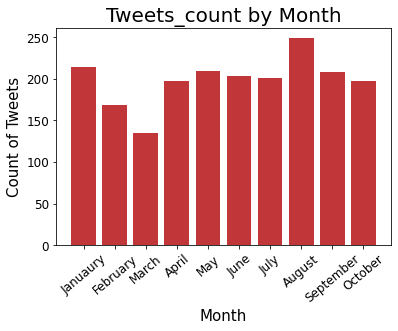

In [45]:
df_tweet_count=df_sorted.groupby("month").agg(tweet_count=('Tweet','count'))
month_name=["Januaury","February","March","April","May","June","July","August","September","October"]
df_tweet_count['Month_Name']=month_name
sns.set_palette("RdBu")
plt.bar(df_tweet_count.Month_Name,df_tweet_count.tweet_count)
plt.title("Tweets_count by Month" ,fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Count of Tweets",fontsize=15)
plt.xticks(rotation=40,fontsize=12)
plt.yticks(fontsize=12)

plt.show()

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

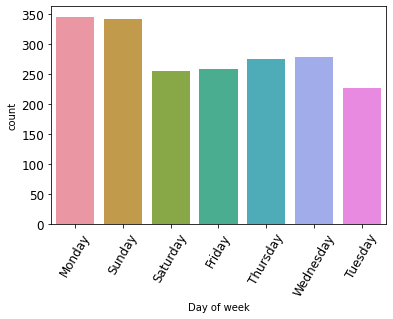

In [44]:
df_day=df['Date'].to_frame()
df_day['Day of week']=df_day['Date'].dt.day_name()
sns.countplot(df_day['Day of week'])
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)

Splitting each tweet sentence into words

In [6]:
df_tweet=df[["Tweet"]]
sentences=[]
for index,row in df_tweet.iterrows():
    sentences.append(row["Tweet"])
words=[]
for i in sentences:
    word=i.split()
    for w in word:
        words.append(w)
print(words)

['Rashtriya', 'Ekta', 'Diwas', 'is', 'a', 'tribute', 'to', 'the', 'invaluable', 'role', 'of', 'Sardar', 'Patel', 'in', 'unifying', 'our', 'nation.', 'https://t.co/mk4k21xpme', 'A', 'glimpse', 'of', 'how', 'our', 'Government', 'has', 'supported', 'the', 'manufacturing', 'sector,', 'breaking', 'free', 'from', 'the', 'conventional', 'mindset', 'that', 'was', 'followed', 'for', 'decades.', 'https://t.co/t4hKepzVei', 'Despite', 'multiple', 'global', 'challenges,', 'India', 'offers', 'a', 'golden', 'opportunity', 'to', 'those', 'who', 'want', 'to', 'invest.', 'https://t.co/sw2H1EvXro', 'The', 'facility', 'whose', 'foundation', 'stone', 'has', 'been', 'laid', 'today', 'is', 'all', 'set', 'to', 'transform', 'the', 'defence', 'and', 'aviation', 'sector.', 'The', 'benefits', 'for', 'MSME', 'sector', 'are', 'immense', 'too.', 'https://t.co/x2uP8sx4Qk', 'Make', 'in', 'India,', 'Make', 'for', 'the', 'Globe!', 'https://t.co/X31mZ5oHyi', 'Aircraft', 'manufacturing', 'facility', 'in', 'Vadodara', 'is'

P.M Modi tagged whom in his tweet the most

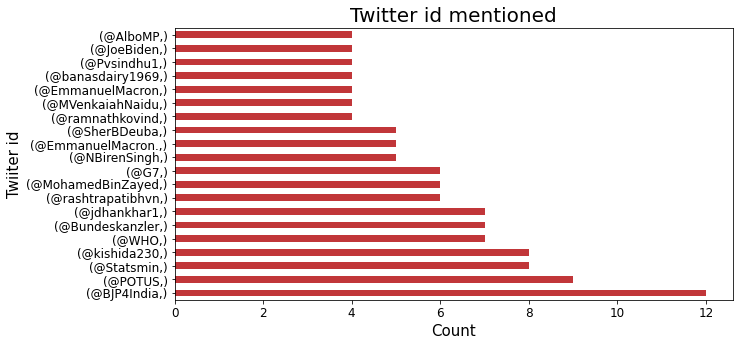

In [43]:
mentions=[]
for i in words:
    if i[0]=="@":
        mentions.append(i)
#Cleaning the twiiter id mentioned 
punc='[_!#$%^&*()<>?/\|}{~:]'
mentions_clean=[]
for i in mentions:
    word=""
    for j in range(0,len(i)):
        if i[j] not in punc:
            word=word+i[j]
    mentions_clean.append(word)
df_mentions=pd.DataFrame(mentions_clean,columns=["Twitter id"])
df_mentions_count=df_mentions.value_counts()
sns.set_palette("RdBu")
plt.figure(figsize = (10,5))
df_mentions_count[0:20].plot(kind='barh')
plt.xlabel('Count',fontsize=15)
plt.ylabel('Twiiter id',fontsize=15)
plt.title('Twitter id mentioned',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

P.M Modi talked on which trend the most or which hashtag was used by him most

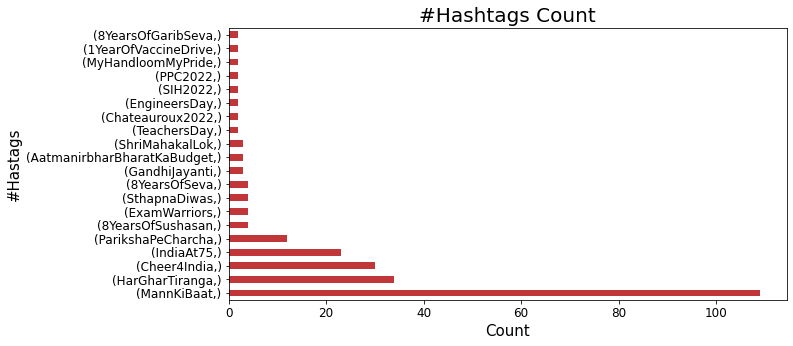

In [42]:
Hashtags=[]
for i in words:
    if i[0]=="#":
        Hashtags.append(i)
#Removing punctuations 
punc='[_!#$%^&*()<>?/\|}{~:,.'
clean_Hashtags=[]
for i in Hashtags:
    tag=""
    for j in range(0,len(i)):
        if i[j] not in punc:
            tag=tag+i[j]
    clean_Hashtags.append(tag)
df_hashtags=pd.DataFrame(clean_Hashtags,columns=["Hsashtags"])
df_hashtags_count=df_hashtags.value_counts()
plt.figure(figsize = (10,5))
df_hashtags_count[0:20].plot(kind='barh')
plt.title('#Hashtags Count',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('#Hastags',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Cleaning words

In [9]:
a="ayush134@fhgehsgwen"

In [27]:
#Removing the links from the data
words_1=[]
for i in words:
    if i[0:5]!="https":
        words_1.append(i)
#Removing the hastags from the data 
words_2=[]
for i in words_1:
    if i[0]!="#":
        words_2.append(i)
#Removing the punctuation from the data 
import re
words_3=[]
for i in words_2:
    w=""
    w=re.sub(r'[^A-Za-z0-9]+','',i)
    words_3.append(w)
#Removing the data from the data 
words_4=[]
for i in words_3:
    if i.isalnum()==True:
        words_4.append(i)
#Removing the word that does not have any english meaning (Hinglish words)
import nltk
nltk.download('words')
clean_words=[]
words=set(nltk.corpus.words.words())
for i in words_4:
    if i.lower() in words:
        clean_words.append(i)
clean_words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


['is',
 'a',
 'tribute',
 'to',
 'the',
 'invaluable',
 'role',
 'of',
 'Patel',
 'in',
 'our',
 'nation',
 'A',
 'glimpse',
 'of',
 'how',
 'our',
 'Government',
 'the',
 'sector',
 'breaking',
 'free',
 'from',
 'the',
 'conventional',
 'that',
 'was',
 'for',
 'Despite',
 'multiple',
 'global',
 'a',
 'golden',
 'opportunity',
 'to',
 'those',
 'who',
 'want',
 'to',
 'invest',
 'The',
 'facility',
 'whose',
 'foundation',
 'stone',
 'been',
 'laid',
 'today',
 'is',
 'all',
 'set',
 'to',
 'transform',
 'the',
 'defence',
 'and',
 'aviation',
 'sector',
 'The',
 'for',
 'sector',
 'are',
 'immense',
 'too',
 'Make',
 'in',
 'Make',
 'for',
 'the',
 'Globe',
 'Aircraft',
 'facility',
 'in',
 'is',
 'giant',
 'leap',
 'towards',
 'becoming',
 'in',
 'aviation',
 'sector',
 'Inspiring',
 'in',
 'and',
 'which',
 'illustrate',
 'close',
 'bond',
 'with',
 'the',
 'environment',
 'and',
 'sustainable',
 'development',
 'taught',
 'us',
 'how',
 'to',
 'live',
 'in',
 'harmony',
 'with',

Counting the words that appear most in the tweets

In [28]:
#Removing the stop words from the data 
root_words=[]
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words_list=list(stop_words)
add_stop_words=['us','one','two','may','many','also','would']
for i in add_stop_words:
    stop_words_list.append(i)
stop_words1=set(stop_words_list)
for i in clean_words:
    if i.lower() not in stop_words1:
        root_words.append(i)
root_words

['tribute',
 'invaluable',
 'role',
 'Patel',
 'nation',
 'glimpse',
 'Government',
 'sector',
 'breaking',
 'free',
 'conventional',
 'Despite',
 'multiple',
 'global',
 'golden',
 'opportunity',
 'want',
 'invest',
 'facility',
 'whose',
 'foundation',
 'stone',
 'laid',
 'today',
 'set',
 'transform',
 'defence',
 'aviation',
 'sector',
 'sector',
 'immense',
 'Make',
 'Make',
 'Globe',
 'Aircraft',
 'facility',
 'giant',
 'leap',
 'towards',
 'becoming',
 'aviation',
 'sector',
 'Inspiring',
 'illustrate',
 'close',
 'bond',
 'environment',
 'sustainable',
 'development',
 'taught',
 'live',
 'harmony',
 'surroundings',
 'culture',
 'Inspired',
 'working',
 'empower',
 'tribal',
 'National',
 'celebration',
 'sports',
 'spirit',
 'like',
 'laud',
 'unique',
 'effort',
 'enhance',
 'research',
 'innovation',
 'hope',
 'follow',
 'practice',
 'special',
 'gift',
 'passionate',
 'youth',
 'working',
 'space',
 'sector',
 'Varsha',
 'Ben',
 'give',
 'glimpse',
 'happiness',
 'land',
 '

In [29]:
#Converting each word in data in lowercase
root_words_1=[]
for i in root_words:
    root_words_1.append(i.lower())
#Stemming the word in the dataset 
from nltk.stem import PorterStemmer
s=PorterStemmer()
stem_word_count={}
for w in root_words_1:
    i=""
    i=s.stem(w)
    if i in stem_word_count:
        stem_word_count[i].append(w)
    else:
        stem_word_count[i]=[w]

#Creating the count table for each stem words
word_count={}
for i in stem_word_count:
    word_count[i]=[len(stem_word_count[i])]
    word_count[i].append(set(stem_word_count[i]))
#Creating the dataframe of words count
words=[]
count=[]
values=word_count.values()
for i in values:
    words.append((i[1]))
    count.append(i[0])
final_word_count={'words':words,'count':count}
df_words=pd.DataFrame.from_dict(final_word_count)
df_words=df_words.sort_values("count",ascending=False)
df_words_top20=df_words[:20]
df_words_top20

,words,count
146,{people},269
48,"{working, work, worked, works}",224
4,"{nation, national}",194
99,"{days, day}",140
79,"{great, greatness}",134
23,{today},132
42,{development},124
165,{life},122
109,{best},121
6,"{governing, government, governance}",117


Cleaning the sentences

In [30]:
def clean_tweet(tweet):
    tweet=re.sub(r'@[A-Za-z0-9]+','',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet=re.sub(r'https?:\/\/\S+','',tweet)
    return tweet  
df['Tweet']=df['Tweet'].apply(clean_tweet) 

Creating the word cloud

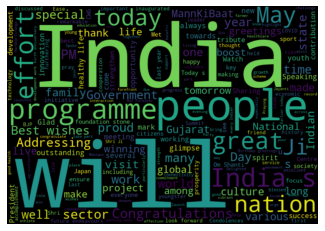

In [31]:
all_words=' '.join([tweets for tweets in df['Tweet']])
wordCloud=WordCloud(width=1000,height=700,random_state=21).generate(all_words)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Finding the Subjectivitiy and Polarity

In [32]:
from textblob import TextBlob
def getSubjectivity(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity
def getPolarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity
df['Subjectivity']=df['Tweet'].apply(getSubjectivity)
df['Polarity']=df["Tweet"].apply(getPolarity)
df

,Date,User,Tweet,month,Subjectivity,Polarity
0,2022-10-31 03:57:59+00:00,narendramodi,Rashtriya Ekta Diwas is a tribute to the inval...,10,0.000000,0.000000
1,2022-10-30 13:42:29+00:00,narendramodi,A glimpse of how our Government has supported ...,10,0.578571,0.128571
2,2022-10-30 13:41:36+00:00,narendramodi,"Despite multiple global challenges, India offe...",10,0.125000,0.100000
3,2022-10-30 13:41:12+00:00,narendramodi,The facility whose foundation stone has been l...,10,1.000000,0.000000
4,2022-10-30 13:40:52+00:00,narendramodi,"Make in India, Make for the Globe!",10,0.000000,0.000000
...,...,...,...,...,...,...
1979,2022-01-01 08:01:09+00:00,narendramodi,Releasing the 10th instalment under PM-KISAN s...,1,0.000000,0.000000
1980,2022-01-01 01:35:09+00:00,narendramodi,Extremely saddened by the loss of lives due to...,1,0.687500,-0.125000
1981,2022-01-01 01:25:24+00:00,narendramodi,Greetings to our energetic Cabinet colleague S...,1,0.466667,0.316667
1982,2022-01-01 01:24:53+00:00,narendramodi,Birthday wishes to Manipur’s dynamic Chief Min...,1,0.283333,0.112500


Sentiment Analysis

In [33]:
def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Sentiment']=df['Polarity'].apply(getSentiment)
df

,Date,User,Tweet,month,Subjectivity,Polarity,Sentiment
0,2022-10-31 03:57:59+00:00,narendramodi,Rashtriya Ekta Diwas is a tribute to the inval...,10,0.000000,0.000000,Neutral
1,2022-10-30 13:42:29+00:00,narendramodi,A glimpse of how our Government has supported ...,10,0.578571,0.128571,Positive
2,2022-10-30 13:41:36+00:00,narendramodi,"Despite multiple global challenges, India offe...",10,0.125000,0.100000,Positive
3,2022-10-30 13:41:12+00:00,narendramodi,The facility whose foundation stone has been l...,10,1.000000,0.000000,Neutral
4,2022-10-30 13:40:52+00:00,narendramodi,"Make in India, Make for the Globe!",10,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
1979,2022-01-01 08:01:09+00:00,narendramodi,Releasing the 10th instalment under PM-KISAN s...,1,0.000000,0.000000,Neutral
1980,2022-01-01 01:35:09+00:00,narendramodi,Extremely saddened by the loss of lives due to...,1,0.687500,-0.125000,Negative
1981,2022-01-01 01:25:24+00:00,narendramodi,Greetings to our energetic Cabinet colleague S...,1,0.466667,0.316667,Positive
1982,2022-01-01 01:24:53+00:00,narendramodi,Birthday wishes to Manipur’s dynamic Chief Min...,1,0.283333,0.112500,Positive


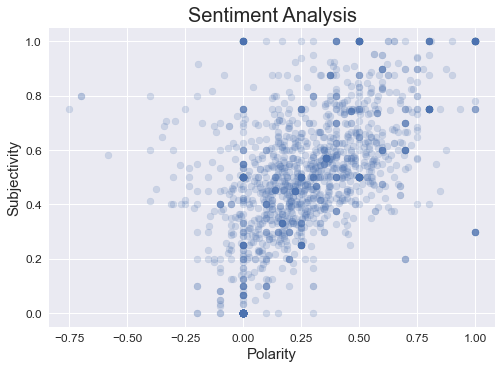

In [38]:
plt.style.use('seaborn')
plt.scatter(df['Polarity'],df['Subjectivity'],alpha=0.2)
plt.title('Sentiment Analysis',fontsize=20)
plt.xlabel('Polarity',fontsize=15)
plt.ylabel('Subjectivity',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

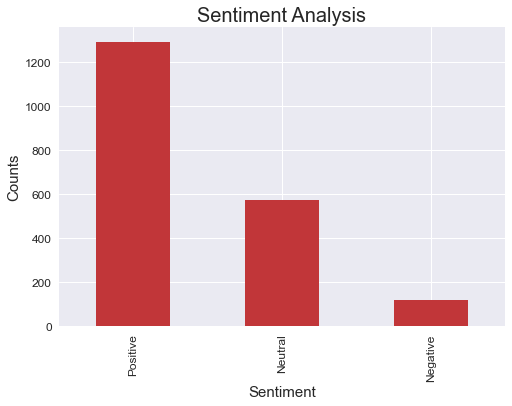

In [39]:
sns.set_palette("RdBu")
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis',fontsize=20)
plt.xlabel('Sentiment',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
